In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import matplotlib.dates as mdates
%matplotlib notebook
from dtaidistance import dtw


In [8]:
def combine_csv_with_date(directory_path, date_pattern=r"(\d{4}-\d{2}-\d{2})"):
    csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
    
    dataframes = []
    for filename in csv_files:
        filepath = os.path.join(directory_path, filename)
        match = re.search(date_pattern, filename)
        if match:
            file_date = match.group(0)
        else:
            print(filename)
            raise Exception()
        
        df = pd.read_csv(filepath)
        df['Date'] = file_date
        dataframes.append(df)
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        # If no CSV files found or if dataframes list is empty
        return pd.DataFrame()  # return an empty DataFrame

In [9]:
df = combine_csv_with_date('../modifiedData')
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,artist_name,artist_genres,album_name,artist_type,Date
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,Omer Adam,"['israeli mediterranean', 'israeli pop', 'mizr...",קאקדילה,Israeli,2022-01-06
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,Static & Ben El,"['israeli pop', 'jewish pop']",שבעה ירחים,Israeli,2022-01-06
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,The Kid LAROI,['australian hip hop'],F*CK LOVE 3: OVER YOU,International,2022-01-06
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,Narkis,['israeli pop'],הולכת איתך,Israeli,2022-01-06
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,Imagine Dragons,"['modern rock', 'pop', 'rock']",Enemy (with JID) [from the series Arcane Leagu...,International,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,Ben Zur,['israeli pop'],אבא,Israeli,2024-12-26
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,Sabrina Carpenter,['pop'],Short n' Sweet,International,2024-12-26
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,Eden Hason,['israeli mediterranean'],אלבום 2,Israeli,2024-12-26
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,Ravid Plotnik,"['israeli hip hop', 'israeli trap']",ועכשיו לחלק האומנותי,Israeli,2024-12-26


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df['artist_genres'] = df['artist_genres'].apply(ast.literal_eval)
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,artist_name,artist_genres,album_name,artist_type,Date,Year,Month,Day
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,Omer Adam,"[israeli mediterranean, israeli pop, mizrahi]",קאקדילה,Israeli,2022-01-06,2022,1,6
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,Static & Ben El,"[israeli pop, jewish pop]",שבעה ירחים,Israeli,2022-01-06,2022,1,6
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,The Kid LAROI,[australian hip hop],F*CK LOVE 3: OVER YOU,International,2022-01-06,2022,1,6
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,Narkis,[israeli pop],הולכת איתך,Israeli,2022-01-06,2022,1,6
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,Imagine Dragons,"[modern rock, pop, rock]",Enemy (with JID) [from the series Arcane Leagu...,International,2022-01-06,2022,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,Ben Zur,[israeli pop],אבא,Israeli,2024-12-26,2024,12,26
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,Sabrina Carpenter,[pop],Short n' Sweet,International,2024-12-26,2024,12,26
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,Eden Hason,[israeli mediterranean],אלבום 2,Israeli,2024-12-26,2024,12,26
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,Ravid Plotnik,"[israeli hip hop, israeli trap]",ועכשיו לחלק האומנותי,Israeli,2024-12-26,2024,12,26


In [11]:
df_grouped_by_date_sum_streams = df.groupby('Date', as_index=False)["streams"].sum()
df_grouped_by_date_sum_streams

,Date,streams
0,2022-01-06,4248357
1,2022-01-13,4244781
2,2022-01-20,3956362
3,2022-01-27,4074886
4,2022-02-03,4068490
...,...,...
151,2024-11-28,10069556
152,2024-12-05,9994756
153,2024-12-12,9959654
154,2024-12-19,9482738


## DTW test
### DTW before and after 7/10/2023 (num of streams)

In [12]:
# Define the event date
event_date = pd.to_datetime("2023-10-07")  # or 07/10

# Extract weekly streams before the event
ts_before = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] < event_date, 'streams'].values

# Extract weekly streams after (and including) the event
ts_after = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] >= event_date, 'streams'].values

distance = dtw.distance(ts_before, ts_after)

print(f"DTW distance between pre-event and post-event weekly streams: {distance:.4f}")

DTW distance between pre-event and post-event weekly streams: 15256886.8281


In [13]:
# Define the event date
event_date = pd.to_datetime("2023-10-07")  # Adjust the format as needed

# Create a DataFrame for dates before the event
df_before = df_grouped_by_date_sum_streams[df_grouped_by_date_sum_streams['Date'] < event_date][['Date', 'streams']]

# Create a DataFrame for dates on/after the event
df_after = df_grouped_by_date_sum_streams[df_grouped_by_date_sum_streams['Date'] >= event_date][['Date', 'streams']]

In [14]:
df_before

,Date,streams
0,2022-01-06,4248357
1,2022-01-13,4244781
2,2022-01-20,3956362
3,2022-01-27,4074886
4,2022-02-03,4068490
...,...,...
87,2023-09-07,6356029
88,2023-09-14,6877342
89,2023-09-21,6383760
90,2023-09-28,5935750


### DTW in "normal times"
#### 6/1/2022-17/11/2022 and 24/11/2022-5/10/2023 (num of streams)

In [61]:
#normal time: 92 weeks (6/1/2022-5/10/2023)
mid_date = pd.to_datetime("2022-11-17")  # 17/11/2022 week number 45

# Extract weekly streams before the event
ts_before = df_before.loc[df_before['Date'] < mid_date, 'streams'].values

# Extract weekly streams after (and including) the event
ts_after = df_before.loc[df_before['Date'] >= mid_date, 'streams'].values

distance = dtw.distance(ts_before, ts_after)

print(f"DTW distance between pre-event and post-event weekly streams in 'normal times': {distance:.4f}")

DTW distance between pre-event and post-event weekly streams in 'normal times': 7193043.5399


### Trend per week

In [16]:
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_grouped_by_date_sum_streams['Date'], df_grouped_by_date_sum_streams['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Weekly Trend of Total Streams')
plt.xlabel('Date')
plt.ylabel('Total Streams')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

### Trend per month

In [17]:
df_grouped_by_month_sum_streams = df
df_grouped_by_month_sum_streams["YearMonth"] = df_grouped_by_month_sum_streams["Date"].dt.to_period("M")
df_grouped_by_month_sum_streams = df.groupby(["YearMonth"], as_index=False).sum("Value")
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_grouped_by_month_sum_streams['YearMonth'].dt.to_timestamp(), df_grouped_by_month_sum_streams['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

### Trend By Artist Type V1

In [18]:
df_grouped_by_date_and_artist_type_sum_streams = df.groupby(['Date', 'artist_type'], as_index=False)["streams"].sum()
df_grouped_by_date_and_artist_type_sum_streams

,Date,artist_type,streams
0,2022-01-06,International,1671596
1,2022-01-06,Israeli,2576761
2,2022-01-13,International,1707019
3,2022-01-13,Israeli,2537762
4,2022-01-20,International,1544091
...,...,...,...
307,2024-12-12,Israeli,8445110
308,2024-12-19,International,1422203
309,2024-12-19,Israeli,8060535
310,2024-12-26,International,1459965


In [19]:
df_israeli = df_grouped_by_date_and_artist_type_sum_streams[df_grouped_by_date_and_artist_type_sum_streams['artist_type']=='Israeli']
df_israeli

,Date,artist_type,streams
1,2022-01-06,Israeli,2576761
3,2022-01-13,Israeli,2537762
5,2022-01-20,Israeli,2412271
7,2022-01-27,Israeli,2566206
9,2022-02-03,Israeli,2495416
...,...,...,...
303,2024-11-28,Israeli,8199803
305,2024-12-05,Israeli,8258353
307,2024-12-12,Israeli,8445110
309,2024-12-19,Israeli,8060535


In [20]:
df_international = df_grouped_by_date_and_artist_type_sum_streams[df_grouped_by_date_and_artist_type_sum_streams['artist_type']=='International']
df_international

,Date,artist_type,streams
0,2022-01-06,International,1671596
2,2022-01-13,International,1707019
4,2022-01-20,International,1544091
6,2022-01-27,International,1508680
8,2022-02-03,International,1573074
...,...,...,...
302,2024-11-28,International,1869753
304,2024-12-05,International,1736403
306,2024-12-12,International,1514544
308,2024-12-19,International,1422203


In [21]:
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_israeli['Date'], df_israeli['streams'], marker='o', linestyle='-',)
plt.plot(df_international['Date'], df_international['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

### Trend By Artist Type V2
##### modified artist type

In [22]:
df_grouped_by_date_and_artist_type_sum_streams_modified = df.groupby(['Date', 'artist_type'], as_index=False)["streams"].sum()
df_grouped_by_date_and_artist_type_sum_streams_modified

,Date,artist_type,streams
0,2022-01-06,International,1671596
1,2022-01-06,Israeli,2576761
2,2022-01-13,International,1707019
3,2022-01-13,Israeli,2537762
4,2022-01-20,International,1544091
...,...,...,...
307,2024-12-12,Israeli,8445110
308,2024-12-19,International,1422203
309,2024-12-19,Israeli,8060535
310,2024-12-26,International,1459965


In [23]:
df_israeli_v2 = df_grouped_by_date_and_artist_type_sum_streams_modified[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type']=='Israeli']
df_israeli_v2

,Date,artist_type,streams
1,2022-01-06,Israeli,2576761
3,2022-01-13,Israeli,2537762
5,2022-01-20,Israeli,2412271
7,2022-01-27,Israeli,2566206
9,2022-02-03,Israeli,2495416
...,...,...,...
303,2024-11-28,Israeli,8199803
305,2024-12-05,Israeli,8258353
307,2024-12-12,Israeli,8445110
309,2024-12-19,Israeli,8060535


In [24]:
df_international_v2 = df_grouped_by_date_and_artist_type_sum_streams_modified[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type']=='International']
df_international_v2

,Date,artist_type,streams
0,2022-01-06,International,1671596
2,2022-01-13,International,1707019
4,2022-01-20,International,1544091
6,2022-01-27,International,1508680
8,2022-02-03,International,1573074
...,...,...,...
302,2024-11-28,International,1869753
304,2024-12-05,International,1736403
306,2024-12-12,International,1514544
308,2024-12-19,International,1422203


In [25]:
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_israeli_v2['Date'], df_israeli_v2['streams'], marker='o', linestyle='-',)
plt.plot(df_international_v2['Date'], df_international_v2['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend of Weekly Streams: Israeli vs. International Songs')
plt.xlabel('Date')
plt.ylabel('Total Streams')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

### Tend by generes

In [26]:
df_grouped_by_artist_genre_sum_streams = df.explode('artist_genres').groupby(['artist_genres'], as_index=False)["streams"].sum()
df_grouped_by_artist_genre_sum_streams

,artist_genres,streams
0,afro r&b,1459188
1,afrobeats,3030473
2,afrofuturism,955413
3,alt z,6185729
4,alternative hip hop,1055391
...,...,...
117,uk pop,11453675
118,urban contemporary,150914
119,urbano latino,2603045
120,viral pop,1685004


In [27]:
df_grouped_by_date_and_artist_genre_sum_streams = df.explode('artist_genres').groupby(['Date', 'artist_genres'], as_index=False)["streams"].sum()
df_grouped_by_date_and_artist_genre_sum_streams

,Date,artist_genres,streams
0,2022-01-06,afro r&b,108187
1,2022-01-06,afrobeats,108187
2,2022-01-06,alt z,103094
3,2022-01-06,australian hip hop,134607
4,2022-01-06,british soul,106836
...,...,...,...
3908,2024-12-26,israeli trap,106315
3909,2024-12-26,k-pop,271610
3910,2024-12-26,mizrahi,2782669
3911,2024-12-26,pop,710905


In [28]:
# Define the mapping function
def modify_genre(genre):
    """
    Modify the artist genre based on keyword presence.
    """
    genre = genre.lower()  # Convert to lowercase for consistency

    if any(keyword in genre for keyword in ["pop", "gen z singer-songwriter", "singer-songwriter", "irish singer-songwriter"]):
        return "Pop"
    elif any(keyword in genre for keyword in ["rock", "indie", "alt z", "permanent wave"]):
        return "Rock & Alternative"
    elif any(keyword in genre for keyword in ["soul", "r&b", "quiet storm", "urban contemporary"]):
        return "R&B & Soul"
    elif any(keyword in genre for keyword in ["rap", "hip hop", "r&drill", "melodic drill"]):
        return "Hip Hop & Rap"
    elif any(keyword in genre for keyword in ["house", "edm", "big room", "trance", "brostep"]):
        return "Electronic (EDM)"
    elif any(keyword in genre for keyword in ["reggaeton", "urbano latino"]):
        return "Latin & Reggaeton"
    elif any(keyword in genre for keyword in ["israeli", "mizrahi", "festigal"]):
        return "Middle Eastern (Mizrahi)"
    elif any(keyword in genre for keyword in ["korean ost", "j-division"]):
        return "Korean & Japanese"
    elif any(keyword in genre for keyword in ["funk", "mellow gold"]):
        return "Funk & Groove"
    elif any(keyword in genre for keyword in ["afrobeats", "afrofuturism"]):
        return "Afro"
    elif any(keyword in genre for keyword in ["electra", "escape room"]):
        return "Experimental & Fusion"
    else:
        return genre  # Default category if no keyword matches

# Apply the function to create the new column
df_grouped_by_date_and_artist_genre_sum_streams['modified_artist_genres'] = df_grouped_by_date_and_artist_genre_sum_streams['artist_genres'].apply(modify_genre)


In [29]:
# Group and sum the streams for each genre category
df_grouped_by_artist_genre = df_grouped_by_date_and_artist_genre_sum_streams.groupby('modified_artist_genres', as_index=False)['streams'].sum()

# Display the result
df_grouped_by_artist_genre


,modified_artist_genres,streams
0,Afro,3985886
1,Electronic (EDM),31529755
2,Experimental & Fusion,2594819
3,Funk & Groove,1801879
4,Hip Hop & Rap,230487062
5,Korean & Japanese,1435994
6,Latin & Reggaeton,5822258
7,Middle Eastern (Mizrahi),513164375
8,Pop,661515762
9,R&B & Soul,10273658


In [30]:
df_grouped_by_date_and_artist_genre_sum_streams.groupby(['Date', 'modified_artist_genres'], as_index=False)['streams'].sum()

,Date,modified_artist_genres,streams
0,2022-01-06,Afro,108187
1,2022-01-06,Electronic (EDM),57865
2,2022-01-06,Funk & Groove,95593
3,2022-01-06,Hip Hop & Rap,867664
4,2022-01-06,Latin & Reggaeton,236708
...,...,...,...
931,2024-12-19,Rock & Alternative,164801
932,2024-12-26,Hip Hop & Rap,669314
933,2024-12-26,Middle Eastern (Mizrahi),6934378
934,2024-12-26,Pop,7025799


In [31]:


# Group and pivot the DataFrame
df = df_grouped_by_date_and_artist_genre_sum_streams.groupby(
    ['Date', 'modified_artist_genres'], as_index=False
)['streams'].sum()

df_pivot = df.pivot(index="Date", columns="modified_artist_genres", values="streams").fillna(0)

# Generate a colormap with unique colors for each genre
num_genres = len(df_pivot.columns)
colors = plt.cm.tab10(np.linspace(0, 1, num_genres))  # Using the 'tab10' colormap for distinct colors

# Plot all genres on the same chart
plt.figure(figsize=(18, 8))

# Plot each genre with a unique color
for genre, color in zip(df_pivot.columns, colors):
    plt.plot(df_pivot.index, df_pivot[genre], label=genre, linewidth=1.5, color=color)

# Chart Labels and Title
plt.title("Streaming Trends of Music Genres Over Time")
plt.xlabel("Date")
plt.ylabel("Total Streams")

# Format x-axis to show every month
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move legend outside the chart
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


<IPython.core.display.Javascript object>

In [32]:
pivoted.plot(kind='bar', figsize=(12,6))
plt.title('Streams Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend(title='Genre')
plt.show()

NameError: name 'pivoted' is not defined

In [20]:
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,artist_name,artist_genres,album_name,artist_type,Date,Year,Month,Day,YearMonth
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,Omer Adam,"[israeli mediterranean, israeli pop, mizrahi]",קאקדילה,Israeli,2022-01-06,2022,1,6,2022-01
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,Static & Ben El,"[israeli pop, jewish pop]",שבעה ירחים,Israeli,2022-01-06,2022,1,6,2022-01
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,The Kid LAROI,[australian hip hop],F*CK LOVE 3: OVER YOU,International,2022-01-06,2022,1,6,2022-01
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,Narkis,[israeli pop],הולכת איתך,Israeli,2022-01-06,2022,1,6,2022-01
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,Imagine Dragons,"[modern rock, pop, rock]",Enemy (with JID) [from the series Arcane Leagu...,International,2022-01-06,2022,1,6,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,Ben Zur,[israeli pop],אבא,Israeli,2024-12-26,2024,12,26,2024-12
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,Sabrina Carpenter,[pop],Short n' Sweet,International,2024-12-26,2024,12,26,2024-12
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,Eden Hason,[israeli mediterranean],אלבום 2,Israeli,2024-12-26,2024,12,26,2024-12
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,Ravid Plotnik,"[israeli hip hop, israeli trap]",ועכשיו לחלק האומנותי,Israeli,2024-12-26,2024,12,26,2024-12


In [21]:
df.explode('artist_genres').groupby(['artist_genres'], as_index=False)["streams"].sum()

,artist_genres,streams
0,afro r&b,1459188
1,afrobeats,3030473
2,afrofuturism,955413
3,alt z,6185729
4,alternative hip hop,1055391
...,...,...
117,uk pop,11453675
118,urban contemporary,150914
119,urbano latino,2603045
120,viral pop,1685004


### Find Outliers

Empty DataFrame
Columns: [Date, streams, z_score]
Index: []


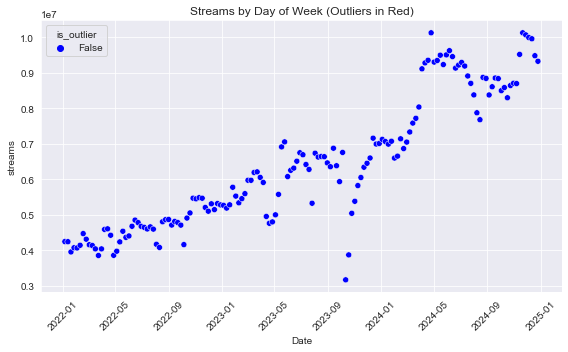

In [22]:

# Compute mean and std dev for each day of week
grouped_mean = df_grouped_by_date_sum_streams.groupby("Date")["streams"].transform("mean")
grouped_std = df_grouped_by_date_sum_streams.groupby("Date")["streams"].transform("std")

df_grouped_by_date_sum_streams["z_score"] = (df_grouped_by_date_sum_streams["streams"] - grouped_mean) / grouped_std

# Threshold for outliers (e.g. abs(z) > 3)
df_grouped_by_date_sum_streams["is_outlier_z"] = np.abs(df_grouped_by_date_sum_streams["z_score"]) > 3

# Filter outliers
outliers_z = df_grouped_by_date_sum_streams[df_grouped_by_date_sum_streams["is_outlier_z"]]
print(outliers_z[["Date", "streams", "z_score"]])

df_grouped_by_date_sum_streams["is_outlier"] = df_grouped_by_date_sum_streams["is_outlier_z"]  # or from the IQR approach

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_grouped_by_date_sum_streams, 
    x="Date", 
    y="streams", 
    hue="is_outlier",   # Color by whether it's an outlier
    palette={True: "red", False: "blue"}
)
plt.title("Streams by Day of Week (Outliers in Red)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


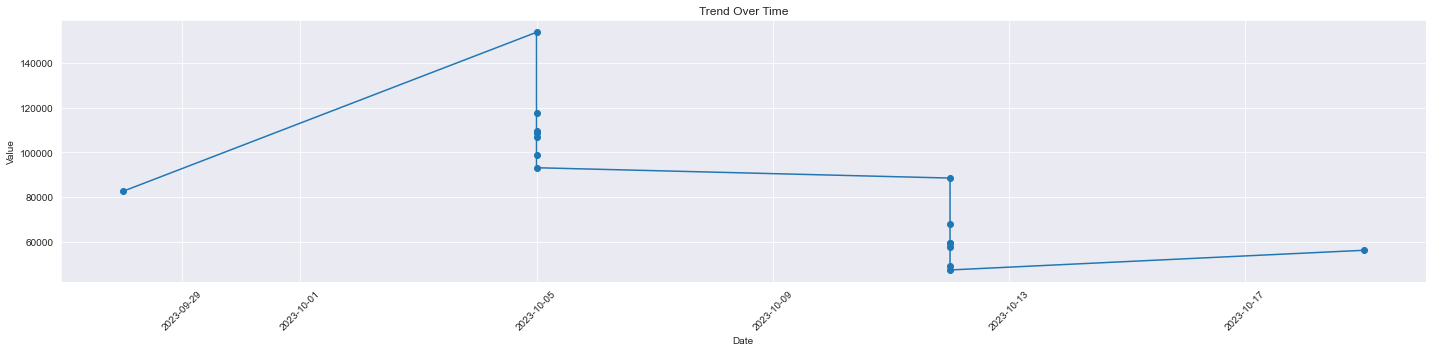

In [23]:
bruno_df = df[df['artist_names'] == 'Bruno Mars']
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

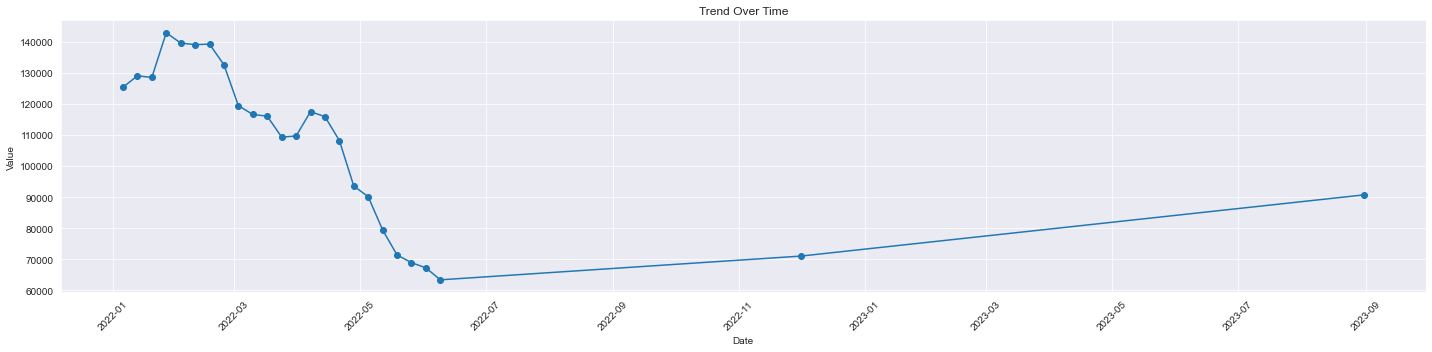

In [24]:
bruno_df = df[df['artist_names'].str.contains('Imagine Dragons', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

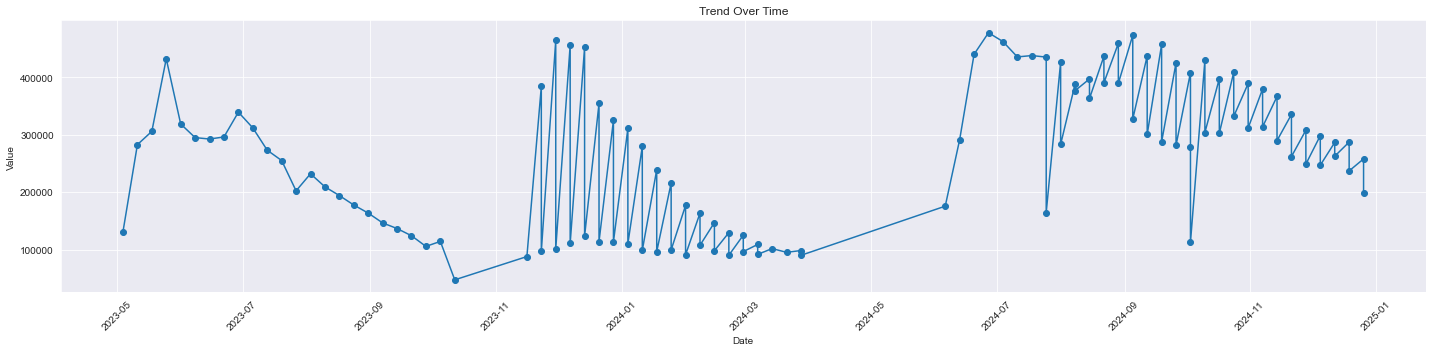

In [25]:
bruno_df = df[df['artist_names'].str.contains('STILLA', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

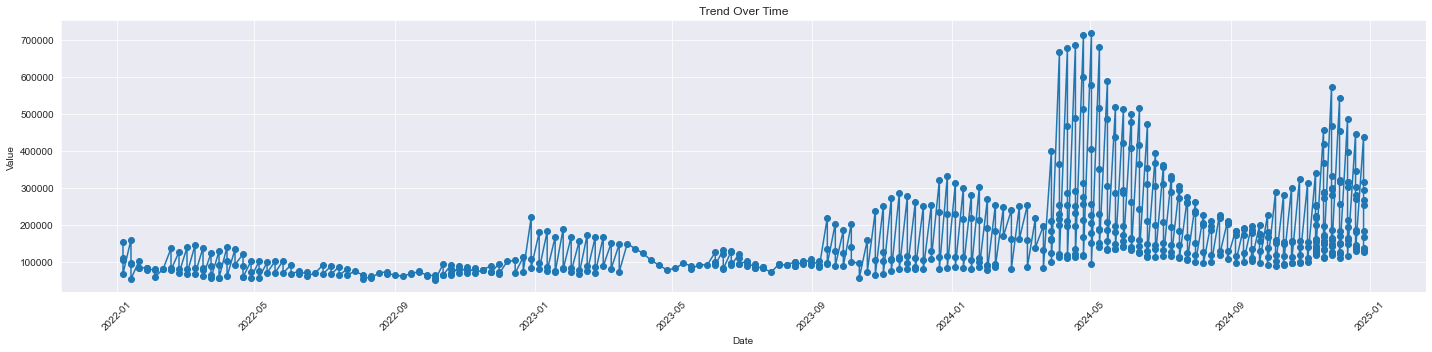

In [26]:
bruno_df = df[df['artist_names'].str.contains('Omer Adam', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

### ANOVA v2

#### Israeli vs Non-Israeli

In [36]:
import pandas as pd
import scipy.stats as stats

In [40]:
df_grouped_by_date_and_artist_type_sum_streams_modified

,Date,artist_type,streams
0,2022-01-06,International,1671596
1,2022-01-06,Israeli,2576761
2,2022-01-13,International,1707019
3,2022-01-13,Israeli,2537762
4,2022-01-20,International,1544091
...,...,...,...
307,2024-12-12,Israeli,8445110
308,2024-12-19,International,1422203
309,2024-12-19,Israeli,8060535
310,2024-12-26,International,1459965


In [73]:
# Extract israeli
df_anova_israeli_before_war = df_before.loc[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type'] == 'Israeli']
df_anova_israeli_after_war = df_after.loc[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type'] == 'Israeli']

# Extract weekly streams after (and including) the event
df_anova_international_before_war = df_before.loc[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type'] == 'International']
df_anova_international_after_war = df_after.loc[df_grouped_by_date_and_artist_type_sum_streams_modified['artist_type'] == 'International']

In [79]:
ts_before_israeli = df_anova_israeli_before_war['streams'].values
ts_before_international = df_anova_international_before_war['streams'].values
f_stat, p_value = stats.f_oneway(ts_before_israeli, ts_before_international)

print(f"ANOVA distance between israeli vs international before war weekly': {f_stat:.4f}, p_value: {p_value}")

ANOVA distance between israeli vs international before war weekly': 0.0044, p_value: 0.9473652246174197


In [80]:
ts_after_israeli = df_anova_israeli_after_war['streams'].values
ts_after_international = df_anova_international_after_war['streams'].values
f_stat, p_value = stats.f_oneway(ts_after_israeli, ts_after_international)

print(f"ANOVA distance between israeli vs international after war weekly': {f_stat:.4f}, p_value: {p_value}")

ANOVA distance between israeli vs international after war weekly': 0.0607, p_value: 0.8061799717159872


In [81]:
ts_before_israeli = df_anova_israeli_before_war['streams'].values
ts_after_israeli = df_anova_israeli_after_war['streams'].values
f_stat, p_value = stats.f_oneway(ts_before_israeli, ts_after_israeli)

print(f"ANOVA distance between israeli before and after war weekly': {f_stat:.4f}, p_value: {p_value}")

ANOVA distance between israeli before and after war weekly': 120.3497, p_value: 2.5044420443935695e-17


In [82]:
ts_before_international = df_anova_international_before_war['streams'].values
ts_after_international = df_anova_international_after_war['streams'].values
f_stat, p_value = stats.f_oneway(ts_before_international, ts_after_international)

print(f"ANOVA distance between international before and after war weekly': {f_stat:.4f}, p_value: {p_value}")

ANOVA distance between international before and after war weekly': 99.1328, p_value: 2.0065902203867904e-15


### ANOVA on streams before and after war

In [83]:
# Define the event date
event_date = pd.to_datetime("2023-10-07")  # or 07/10

# Extract weekly streams before the event
ts_before = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] < event_date, 'streams'].values

# Extract weekly streams after (and including) the event
ts_after = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] >= event_date, 'streams'].values

f_stat, p_value = stats.f_oneway(ts_before, ts_after)

print(f"ANOVA distance between streams before and after war weekly': {f_stat:.4f}, p_value: {p_value}")

ANOVA distance between streams before and after war weekly': 220.8606, p_value: 1.4844048973365626e-31


### T-TEST

In [86]:
from scipy.stats import ttest_ind

# Define the event date
event_date = pd.to_datetime("2023-10-07")  # or 07/10

# Extract weekly streams before the event
before_war = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] < event_date, 'streams']

# Extract weekly streams after (and including) the event
after_war = df_grouped_by_date_sum_streams.loc[df_grouped_by_date_sum_streams['Date'] >= event_date, 'streams']

t_stat, p_val = ttest_ind(before_war, after_war, equal_var=False)

print(f"T-TEST distance between pre-event and post-event weekly: {t_stat:.4f}, p_value: {p_val}")

T-TEST distance between pre-event and post-event weekly in 'normal times': -13.6141, p_value: 6.69525363579205e-24


In [87]:
ts_before_israeli = df_anova_israeli_before_war['streams'].values
ts_before_international = df_anova_international_before_war['streams'].values
t_stat, p_val = ttest_ind(ts_before_israeli, ts_before_international, equal_var=False)

print(f"T-TEST distance between pre-event and post-event weekly: {t_stat:.4f}, p_value: {p_val}")

T-TEST distance between pre-event and post-event weekly: -0.0662, p_value: 0.9473652544173072


In [88]:
ts_after_israeli = df_anova_israeli_after_war['streams'].values
ts_after_international = df_anova_international_after_war['streams'].values
t_stat, p_val = ttest_ind(ts_after_israeli, ts_after_international, equal_var=False)

print(f"T-TEST distance between pre-event and post-event weekly: {t_stat:.4f}, p_value: {p_val}")

T-TEST distance between pre-event and post-event weekly: 0.2464, p_value: 0.8061855389092274


In [89]:
ts_before_israeli = df_anova_israeli_before_war['streams'].values
ts_after_israeli = df_anova_israeli_after_war['streams'].values
t_stat, p_val = ttest_ind(ts_before_israeli, ts_after_israeli, equal_var=False)

print(f"T-TEST distance between pre-event and post-event weekly: {t_stat:.4f}, p_value: {p_val}")

T-TEST distance between pre-event and post-event weekly: -10.0923, p_value: 2.3942519209348224e-13


In [90]:
ts_before_international = df_anova_international_before_war['streams'].values
ts_after_international = df_anova_international_after_war['streams'].values
t_stat, p_val = ttest_ind(ts_before_international, ts_after_international, equal_var=False)

print(f"T-TEST distance between pre-event and post-event weekly: {t_stat:.4f}, p_value: {p_val}")

T-TEST distance between pre-event and post-event weekly: -9.0715, p_value: 1.0043056554629531e-11
